# 15K: Plot Energia su Intensità

In [21]:
from picchi import raccoglitore_2 # picchi reference
from varshni_subroutines import *

d_o_emi = ['emi=0', 'emi=0o5', 'emi=1', 'emi=1o5', 'emi=2', 'emi=2o5', 'emi=3']#, '3o5']
d_o_ass = ['ass=1', 'ass=0']

data = {}

In [22]:
etichette_x = ["ass=1\nemi=0", 
               "ass=0\nemi=0.5", 
               "ass=0\nemi=1", 
               "ass=0\nemi=1.5", 
               "ass=0\nemi=2", 
               "ass=0\nemi=2.5", 
               "ass=0\nemi=3"]

In [23]:
for ass in d_o_ass:
        
        data[ass] = {}
        
        emi_list = d_o_emi[1:] if ass == 'ass=0' else ['emi=0']  # Per ass=1 usa solo emi='0'
        
        # Per ciascuno degli emi > 0 se ass=0, solo emi=0 se ass=1
        for emi in emi_list:
            
            data[ass][emi] = []
            arr_picchi_sx_qd  = []
            arr_err_picchi_sx_qd  = []
            arr_picchi_dx_qd  = []
            arr_err_picchi_dx_qd  = []
            
            #print(ass, ' | ', emi)
            
            if len(raccoglitore_2[ass][emi][0]['Regione 1']) > 1:
                picco_sx = raccoglitore_2[ass][emi][0]['Regione 1'][1][0]                
            else:
                picco_sx = 0
                
            if len(raccoglitore_2[ass][emi][0]['Regione 2']) > 1:
                picco_dx = raccoglitore_2[ass][emi][0]['Regione 2'][1][0]
            else:
                picco_dx = 0
            
            # conversione dei nm in eV degli errori
            # err_picco_sx = err_lambda_to_E(picco_sx, err_picco_sx)
            # err_picco_dx = err_lambda_to_E(picco_dx, err_picco_dx)
            
            # HACK: PROVO A METTERE ERRORE in nm 299.582/399 = 0,7508320802 nm cioè risoluzione apparato
            # mentre la versione precedente considera gli errori sui picchi forniti dal fitter
            err_picco_sx = err_lambda_to_E(picco_sx, 0.7508320802)
            err_picco_dx = err_lambda_to_E(picco_dx, 0.7508320802)
            
            # conversione dei nm in eV dei picchi
            picco_sx = lambda_to_E(picco_sx)
            picco_dx = lambda_to_E(picco_dx)  
            
            # riempimento del contenitore data    
            data[ass][emi].append(picco_sx)
            data[ass][emi].append(err_picco_sx)
            data[ass][emi].append(picco_dx)
            data[ass][emi].append(err_picco_dx)

In [24]:
data['ass=1']

{'emi=0': [np.float64(1.6326297286753046),
  np.float64(0.0016141670951221204),
  0,
  0]}

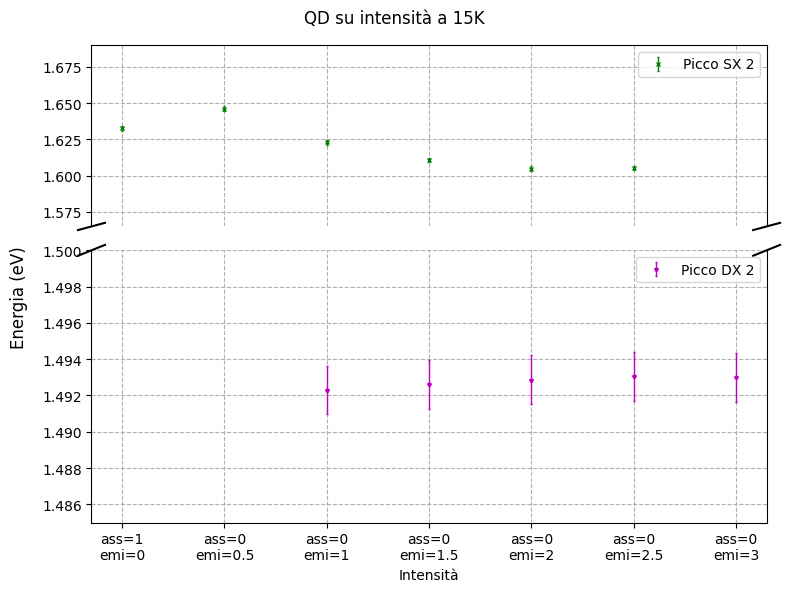

picco SX 2:
[np.float64(1.6326297286753046), np.float64(1.6460690628310126), np.float64(1.6229660777531325), np.float64(1.610907153079338), np.float64(1.6049073728291907), np.float64(1.605125365089546)]
errore picco SX 2:
[np.float64(0.0016141670951221204), np.float64(0.0016408511830014703), np.float64(0.0015951149095354369), np.float64(0.001571499000734642), np.float64(0.001559814788797419), np.float64(0.0015602385523740955)]
picco DX 2:
[np.float64(1.4923024544268924), np.float64(1.4926299961892349), np.float64(1.4928703375055727), np.float64(1.4930610605509524), np.float64(1.4930027631800706)]
errore picco DX 2:
[np.float64(0.001348611304768321), np.float64(0.0013492033764343526), np.float64(0.0013496379053169784), np.float64(0.0013499827758494472), np.float64(0.0013498773563027238)]


In [25]:
# picco sx 2
x2 = []
y2 = []
err_y2 = []
# picco dx 2
x4 = []
y4 = []
err_y4 = []

i = 1


for ass in d_o_ass:
    emi_list = d_o_emi[1:] if ass == 'ass=0' else ['emi=0']  # Per ass=1 usa solo emi='0'
    
    # Per ciascuno degli emi > 0 se ass=0, solo emi=0 se ass=1
    for emi in emi_list:
        x2.append(i)
        x4.append(i)
    
        # picco sx 2
        y2.append(data[ass][emi][0])
        err_y2.append(data[ass][emi][1])
        
        # picco dx 2
        y4.append(data[ass][emi][2])
        err_y4.append(data[ass][emi][3])
        
        i += 1
        
# vanno eliminati i punti con ordinata 0 (non è stato individuato il picco)
x2 = [x_val for x_val, y_val in zip(x2, y2) if y_val != 0]
y2 = [y_val for y_val in y2 if y_val != 0]
err_y2 = [e_y_val for e_y_val in err_y2 if e_y_val != 0]

x4 = [x_val for x_val, y_val in zip(x4, y4) if y_val != 0]
y4 = [y_val for y_val in y4 if y_val != 0]
err_y4 = [e_y_val for e_y_val in err_y4 if e_y_val != 0]

# Creazione della figura
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [4, 6]}, figsize=(8, 6))

# Plot superiore (range > 1.59)
ax1.errorbar(x2, y2, yerr=err_y2, fmt='gx', label='Picco SX 2', markersize=3, elinewidth=1, capsize=1)
ax1.errorbar(x4, y4, yerr=err_y4, fmt='m*', markersize=3, elinewidth=1, capsize=1)
ax1.set_ylim(1.565, 1.690)  # Intervallo superiore
ax1.spines['bottom'].set_visible(False)
ax1.tick_params(bottom=False)
ax1.grid(linestyle='--')

# Plot inferiore (range < 1.54)
ax2.errorbar(x2, y2, yerr=err_y2, fmt='gx', markersize=3, elinewidth=1, capsize=1)
ax2.errorbar(x4, y4, yerr=err_y4, fmt='m*', label='Picco DX 2', markersize=3, elinewidth=1, capsize=1)
ax2.set_ylim(1.485, 1.50)  # Intervallo inferiore
ax2.spines['top'].set_visible(False)
ax2.grid(linestyle='--')

# Aggiunta della "scaletta" per indicare il break
d = 0.02  # Distanza delle linee spezzate
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)  # Linea spezzata in alto
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)

kwargs.update(transform=ax2.transAxes)
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # Linea spezzata in basso
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

# Etichette e titolo
ax2.set_xlabel('Intensità')
ax2.set_xticks(range(1, 8))
ax2.set_xticklabels(etichette_x)
ax1.legend()
ax2.legend()
fig.supylabel('Energia (eV)')
fig.suptitle('QD su intensità a 15K')

# Mostrare il grafico
plt.tight_layout()
plt.show()

# STAMPA DEI VALORI
print ('picco SX 2:')
print (y2)
print ('errore picco SX 2:')
print (err_y2)

print ('picco DX 2:')
print (y4)
print ('errore picco DX 2:')
print (err_y4)
